In [1]:
import tensorflow as tf
import os
import zipfile
import random
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [12]:
path = f"{getcwd()}/dogs-vs-cats.zip"
local_zip=path
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('cats_vs_dogs/data')
zip_ref.close()

In [18]:
#unzip traing set
path_train=f"{getcwd()}/data/train.zip"
local_zip_train = path_train
zip_ref_train=zipfile.ZipFile(local_zip_train,'r')
zip_ref_train.extractall('cats_vs_dogs/data/train')
zip_ref_train.close()

In [17]:
#unzip testing data
path_test=f"{getcwd()}/data/test1.zip"
local_zip_test = path_train
zip_ref_test=zipfile.ZipFile(local_zip_train,'r')
zip_ref_test.extractall('cat_vs_dogs/data/test')
zip_ref_test.close()

In [2]:
print(len(os.listdir('/data/train')))
print(len(os.listdir('/data/test')))

2
11489


In [3]:
train_dir="/data/train"
#print(len(os.listdir(train_dir)))
train_datagen=ImageDataGenerator(rescale=1.0/255.)
train_generator=train_datagen.flow_from_directory(train_dir,
                                                 batch_size=10,
                                                 class_mode='binary',
                                                 target_size=(150,150))


Found 25000 images belonging to 2 classes.


In [4]:
test_dir="/data/test"
#print(len(os.listdir(test_dir)))
test_datagen=ImageDataGenerator(rescale=1.0/255.)
test_generator=test_datagen.flow_from_directory(test_dir,
                                                 batch_size=10,
                                                 class_mode='binary',
                                                 target_size=(150,150))

Found 1013 images belonging to 2 classes.


In [5]:
train_fnames = os.listdir(train_dir+'/cat')
test_fnames = os.listdir(test_dir)
print(train_fnames[:10])
print(test_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg']
['10000.jpg', '10001.jpg', '10002.jpg', '10003.jpg', '10004.jpg', '10005.jpg', '10006.jpg', '10007.jpg', '10008.jpg', '10009.jpg']


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2), 
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),  #Flatten the result and fit them into Dense Neural network
                                    tf.keras.layers.Dense(512, activation='relu'), #Dense layer with 512 hidden units
                                    #only one output unti due to binary classifaction,
                                    tf.keras.layers.Dense(1, activation='sigmoid')  

])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [6]:
model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [ ]:
history = model.fit_generator(train_generator,
                              epochs=100,
                              steps_per_epoch=2500,
                              verbose=1,
                              validation_data=test_generator)


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
2500/2500 [==============================] - 986s 393ms/step - loss: 0.5662 - acc: 0.7015 - val_loss: 0.4929 - val_acc: 0.7552
Epoch 2/100
2500/2500 [==============================] - 909s 364ms/step - loss: 0.4604 - acc: 0.7862 - val_loss: 0.4775 - val_acc: 0.7769
Epoch 3/100
2500/2500 [==============================] - 913s 365ms/step - loss: 0.4117 - acc: 0.8133 - val_loss: 0.4614 - val_acc: 0.7799
Epoch 4/100
2500/2500 [==============================] - 5138s 2s/step - loss: 0.3758 - acc: 0.8320 - val_loss: 0.4300 - val_acc: 0.7907
Epoch 5/100
2500/2500 [==============================] - 917s 367ms/step - loss: 0.3391 - acc: 0.8526 - val_loss: 0.4199 - val_acc: 0.8036
Epoch 6/100
2500/2500 [==============================] - 1050s 420ms/step - loss: 0.3093 - acc: 0.8672 - val_loss: 0.5130 - val_acc: 0.7838
Epoch 7/100
2425/2500 [============================>.] - ETA: 39s - loss: 0.2849 - acc: 0.8840

Text(0.5, 1.0, 'Training and validation loss')

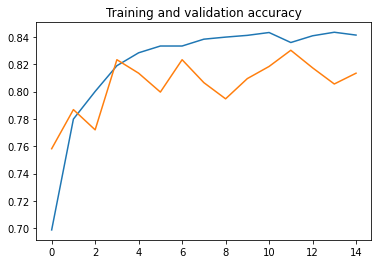

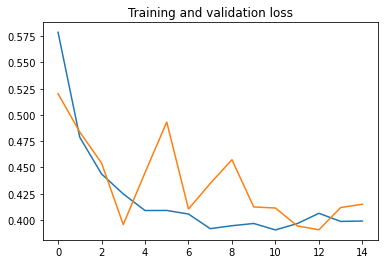

In [23]:
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()